In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
crime_df = pd.read_csv('./dataset/crime.csv', encoding='latin-1')
oc_df = pd.read_csv('./dataset/offense_codes.csv', encoding='latin-1')
oc_df = oc_df.rename(columns={'CODE': 'OFFENSE_CODE', 'NAME': 'OFFENSE_NAME'})
df = pd.merge(crime_df, oc_df, on='OFFENSE_CODE')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE_NAME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY ALL OTHERS
1,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY OTHER $200 & OVER
2,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,NaN,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)",LARCENY ALL OTHERS
3,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,NaN,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)",LARCENY OTHER $200 & OVER
4,I182070816,619,Larceny,LARCENY ALL OTHERS,C6,185,NaN,2018-09-03 12:45:00,2018,9,Monday,12,Part One,MASSACHUSETTS AVE,42.321987,-71.062807,"(42.32198656, -71.06280666)",LARCENY ALL OTHERS


In [13]:
df.shape

(577880, 18)

In [14]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2924
REPORTING_AREA              0
SHOOTING               575901
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   94
STREET                  17560
Lat                     32548
Long                    32548
Location                    0
OFFENSE_NAME                0
dtype: int64

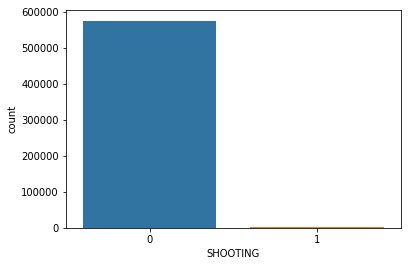

In [16]:
df['SHOOTING'].unique()
df['SHOOTING'] = df['SHOOTING'].apply(lambda x: 1 if x=='Y' else 0)
_ = sns.countplot(df['SHOOTING'])

In [17]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                2924
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  94
STREET                 17560
Lat                    32548
Long                   32548
Location                   0
OFFENSE_NAME               0
dtype: int64

In [18]:
df = df.dropna()
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
OFFENSE_NAME           0
dtype: int64

In [19]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE_NAME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY ALL OTHERS
1,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",LARCENY OTHER $200 & OVER
2,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,0,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)",LARCENY ALL OTHERS
3,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,0,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)",LARCENY OTHER $200 & OVER
4,I182070816,619,Larceny,LARCENY ALL OTHERS,C6,185,0,2018-09-03 12:45:00,2018,9,Monday,12,Part One,MASSACHUSETTS AVE,42.321987,-71.062807,"(42.32198656, -71.06280666)",LARCENY ALL OTHERS


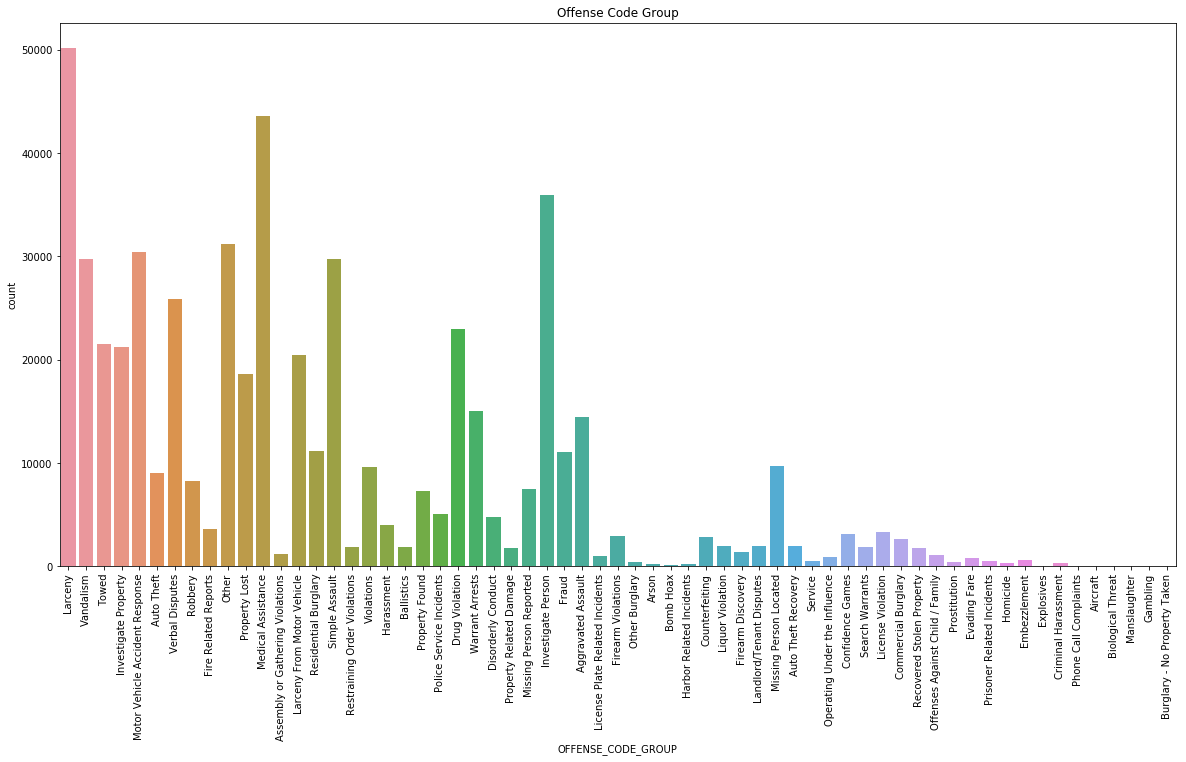

In [20]:
plt.figure(figsize=(20, 10))
p = sns.countplot(df['OFFENSE_CODE_GROUP'])
plt.title('Offense Code Group')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [21]:
df_year = df.groupby(['YEAR']).size().reset_index(name='counts')
df_month = df.groupby(['MONTH']).size().reset_index(name='counts')

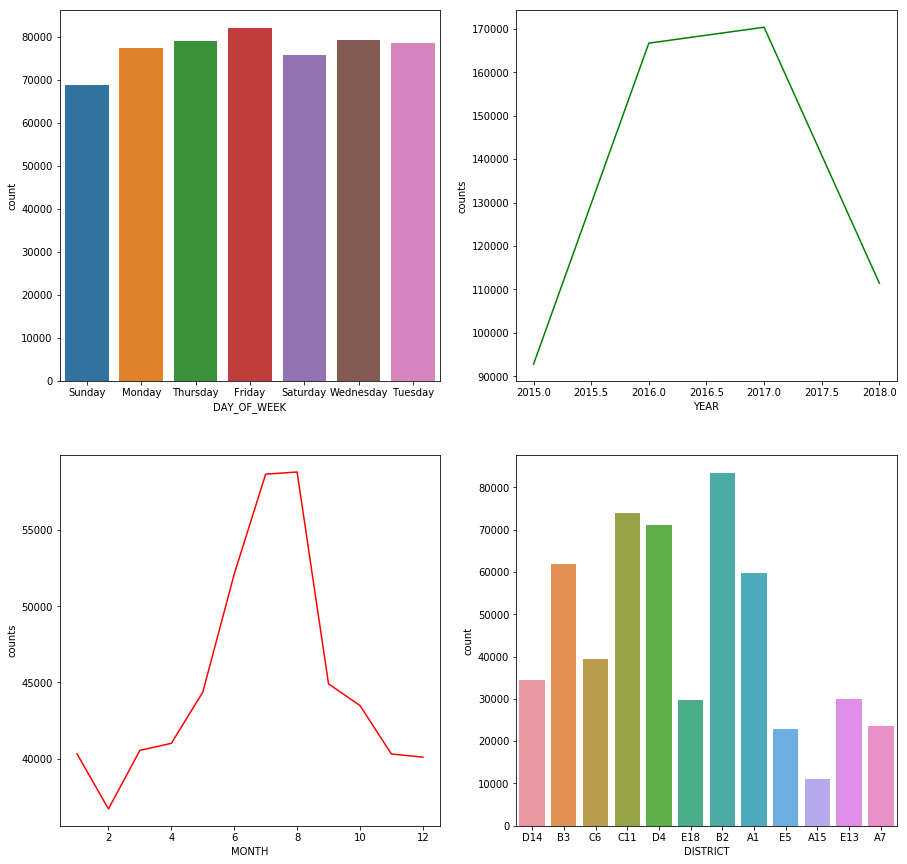

In [22]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)

p = sns.countplot(df['DAY_OF_WEEK'], ax=axs[0, 0])
q = sns.lineplot(x=df_month['MONTH'], y=df_month['counts'], ax=axs[1, 0], color='r')
r = sns.lineplot(x=df_year['YEAR'], y=df_year['counts'], ax=axs[0,1], color='g')
s = sns.countplot(df['DISTRICT'], ax=axs[1,1])

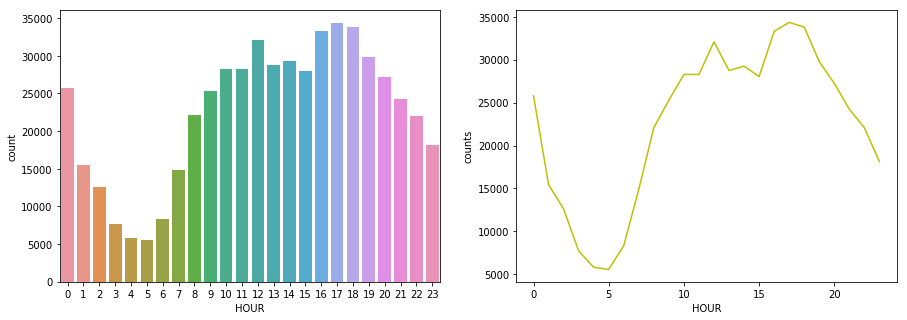

In [23]:
df_hour = df.groupby(['HOUR']).size().reset_index(name='counts')
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)

p = sns.countplot(df['HOUR'], ax=axs[0])
q = sns.lineplot(x=df_hour['HOUR'], y=df_hour['counts'], ax=axs[1], color='y')

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


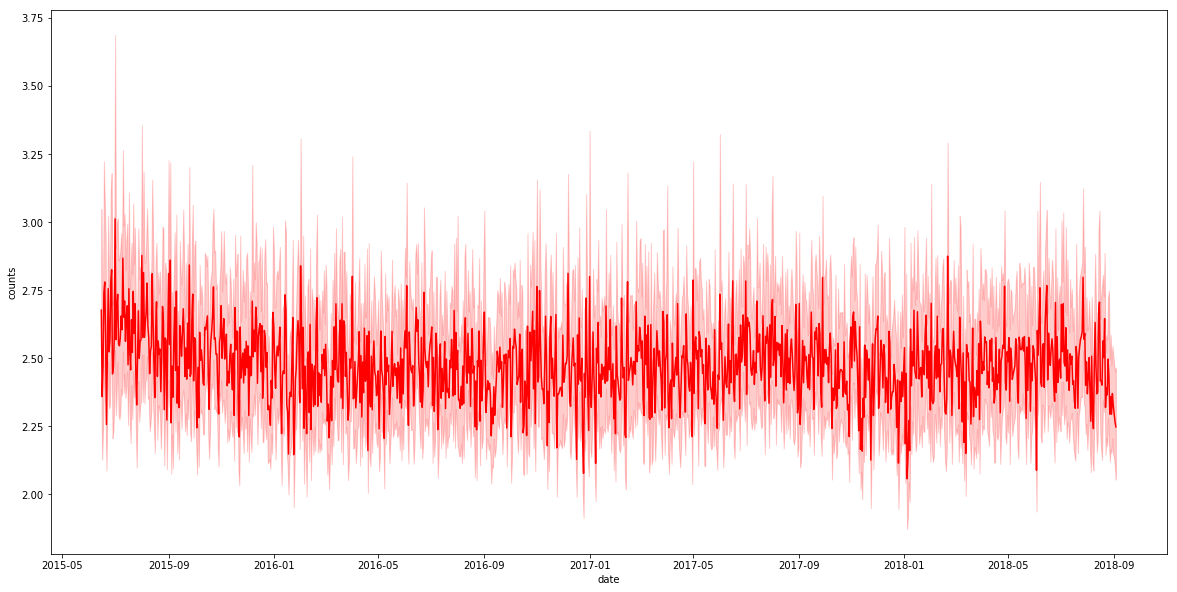

In [24]:
df_date = df.groupby(['OCCURRED_ON_DATE']).size().reset_index(name='counts')
df_date['date'] =df_date.apply(lambda x: pd.to_datetime(x['OCCURRED_ON_DATE'].split(' ')[0]), axis=1)


plt.figure(figsize=(20, 10))
p = sns.lineplot(x=df_date['date'], y=df_date['counts'], color='r')

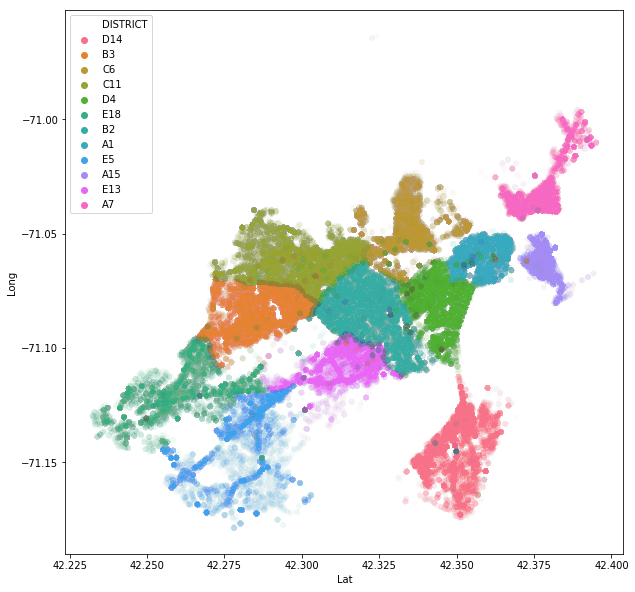

In [25]:
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

plt.figure(figsize=(10, 10))
p = sns.scatterplot(x='Lat', y='Long', hue='DISTRICT',alpha=0.01, data=df)